Task 1: Data Understanding & Preprocessing

In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [45]:
df=pd.read_csv(r"C:\ai_assignment\Telco-Customer-Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Perform data cleaning

In [46]:
df.shape

(7043, 21)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Handle missing values

In [48]:
# checking for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [51]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4564,4877-EVATK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.0,20,Yes


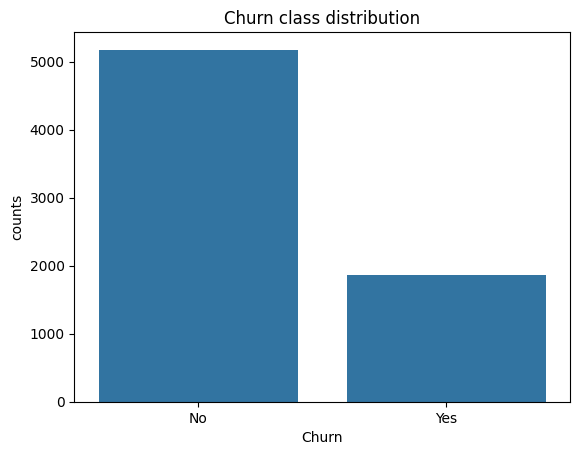

In [52]:
sns.countplot(data=df,x='Churn') # count plot
plt.title("Churn class distribution")
plt.xlabel("Churn")
plt.ylabel("counts")
plt.show()

In [53]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [54]:
df.drop("customerID", axis=1, inplace=True)


In [55]:
# encoding the target variable
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})


In [56]:
df["Churn"].isna().sum()
df["Churn"].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [57]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Encode categorical variables

In [58]:
le=LabelEncoder()

In [59]:
# encoding categorical variables

label_encoders = {}  

cat_columns = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]

for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [61]:
# splitting features and target variable

x = df.drop("Churn", axis=1)
y = df["Churn"]


In [62]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [63]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Task 2: Model Building 

In [64]:
 # splitting the dataset into training and testing sets
 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (5634, 19)
x_test: (1409, 19)
y_train: (5634,)
y_test: (1409,)


In [67]:
# scaling the features

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Build a classification model using Logistic Regression, Random Forest, XGBoost this algorithmns 

In [69]:
 # once again importing libraries
 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [70]:
 # using Logistic Regression model
lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

In [99]:
lr.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [100]:
y_pred_lr = lr.predict(x_test_scaled)

In [101]:
y_pred_lr

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [74]:
from sklearn.ensemble import RandomForestClassifier
# using Random Forest Classifier model

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
y_pred_rf= rf.predict(x_test)

In [76]:
y_pred_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
# using XGBoost Classifier model

XGB=XGBClassifier(random_state=42)
XGB.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [78]:
y_pred_XGB=XGB.predict(x_test)

In [79]:
y_pred_XGB

array([1, 0, 0, ..., 0, 0, 1])

Evaluate using accuracy, precision, recall, F1-score

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# checking performance of all models 

import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_XGB)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_XGB)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_XGB)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_XGB)
    ]
})

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.758694,0.528014,0.833780,0.646570
1,Random Forest,0.803407,0.686047,0.474531,0.561014
2,XGBoost,0.794180,0.636066,0.520107,0.572271


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [87]:
param_grid = {
    "C": [0.01, 0.1, 1, 10]
}


In [102]:
grid_lr = GridSearchCV(
    LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ),
    param_grid=param_grid,
    scoring="f1",      # IMPORTANT for churn
    cv=5,
    n_jobs=-1
)

grid_lr.fit(x_train_scaled, y_train)


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [103]:
print("Best Parameters:", grid_lr.best_params_)

best_lr = grid_lr.best_estimator_


Best Parameters: {'C': 10}


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }


In [105]:
y_pred_best_lr = best_lr.predict(x_test_scaled)
evaluate(y_test, y_pred_best_lr)


{'Accuracy': 0.7565649396735273,
 'Precision': 0.5252525252525253,
 'Recall': 0.8364611260053619,
 'F1 Score': 0.6452947259565667}

In [106]:
 # saving the best model
import joblib


In [108]:
joblib.dump(label_encoders,"label_encoders.pkl")
joblib.dump(scaler,"scaler.pkl")
joblib.dump(best_lr,"churn_model.pkl")

['churn_model.pkl']

In [109]:
import os
os.makedirs("models", exist_ok=True)


In [113]:
feature_columns = x.columns.tolist()

import joblib
joblib.dump(feature_columns, "models/feature_columns.pkl")


['models/feature_columns.pkl']

In [110]:
joblib.dump(label_encoders, "models/label_encoders.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(best_lr, "models/churn_model.pkl")


['models/churn_model.pkl']

In [111]:
import os
os.listdir("models")


['churn_model.pkl', 'label_encoders.pkl', 'scaler.pkl']

Task 3: AI Logic & Explanation

Why this model was chosen

Multiple classification models were evaluated, including Logistic Regression, Random Forest, and XGBoost. Logistic Regression was selected as the final model because it achieved the best overall balance between recall and F1-score after hyperparameter tuning. In customer churn prediction, recall is a critical metric because failing to identify a customer who is likely to churn can lead to revenue loss. The tuned Logistic Regression model achieved high recall while maintaining good overall accuracy. Additionally, Logistic Regression is simple, interpretable, and computationally efficient, making it suitable for deployment in a production environment.

How features impact prediction

The model learns patterns from customer demographics, service usage, and billing behavior to predict churn. Features such as tenure, contract type, monthly charges, and total charges have a strong influence on churn prediction. Customers with shorter tenure, month-to-month contracts, and higher monthly charges are more likely to churn. Service-related features such as lack of online security, technical support, and device protection also increase churn probability, as they reflect lower customer engagement and satisfaction. These features collectively help the model distinguish between high-risk and low-risk customers.

What improvements can be done

Model performance was improved using hyperparameter tuning by optimizing the regularization strength of Logistic Regression. Further improvements can be achieved through additional feature engineering, such as creating interaction features or incorporating customer usage trends over time. Threshold tuning could be applied to further optimize recall based on business requirements. Additionally, incorporating more behavioral or temporal data and experimenting with advanced ensemble techniques could enhance model performance in future iterations.

Why we did NOT increase value counts in this project 

The churn dataset showed a moderate class imbalance, with approximately 73% non-churn and 27% churn instances. This level of imbalance is common in real-world business datasets and is not severe enough to require oversampling. Increasing value counts through duplication or synthetic data generation could introduce bias and reduce the model’s ability to generalize. Instead, class imbalance was handled using class-weight adjustments, which allowed the model to learn from the minority class without altering the original data distribution.

Task 4: Deployment / API